In [1]:
# 🚀 Auto-setup: installs deps + configures CFBD access
import os
import sys
from pathlib import Path

# Find _auto_setup.py regardless of current working directory
_current = Path().resolve()
_auto_setup_path = None
for parent in [_current] + list(_current.parents):
    candidate = parent / "starter_pack" / "_auto_setup.py"
    if candidate.exists():
        _auto_setup_path = candidate
        # Add project root to sys.path (auto_setup.py will also do this)
        if str(parent) not in sys.path:
            sys.path.insert(0, str(parent))
        break

if _auto_setup_path and _auto_setup_path.exists():
    # Execute the file directly without changing directory
    with open(_auto_setup_path, 'r') as f:
        exec(f.read(), {'__file__': str(_auto_setup_path)})
else:
    # Fallback: try relative path
    try:
        with open("./_auto_setup.py", 'r') as f:
            exec(f.read(), {'__file__': './_auto_setup.py'})
    except FileNotFoundError:
        print("⚠️  Could not find _auto_setup.py. Please run from starter_pack directory.")


ModuleNotFoundError: No module named 'starter_pack'

In [2]:
# 11_metric_distribution_explorer.ipynb
# 📊 Distribution Explorer for Advanced Metrics

# 🛠 Requirements:
# - pandas, seaborn, matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sys
from pathlib import Path

# Import starter pack configuration system
_config_dir = Path().resolve() / "config"
if str(_config_dir.parent) not in sys.path:
    sys.path.insert(0, str(_config_dir.parent))
from config.data_config import get_starter_pack_config

# Get configuration
config = get_starter_pack_config()
current_year = config.current_year
DATA_DIR = str(config.data_dir)



plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]


In [3]:
# 📂 Load advanced season stats

stats_path = str(config.get_advanced_stats_path(year=current_year))
stats = pd.read_csv(stats_path)

# Filter to FBS teams
teams = stats[stats["conference"].notnull()].copy()

print(f"{len(teams)} FBS teams loaded")


136 FBS teams loaded


In [4]:
# 🎯 Pick metric to explore (must be numeric) and team to highlight
# Examples: offense_ppa, defense_successRate, offense_explosiveness

metric = "defense_ppa"
team_to_highlight = "Michigan"

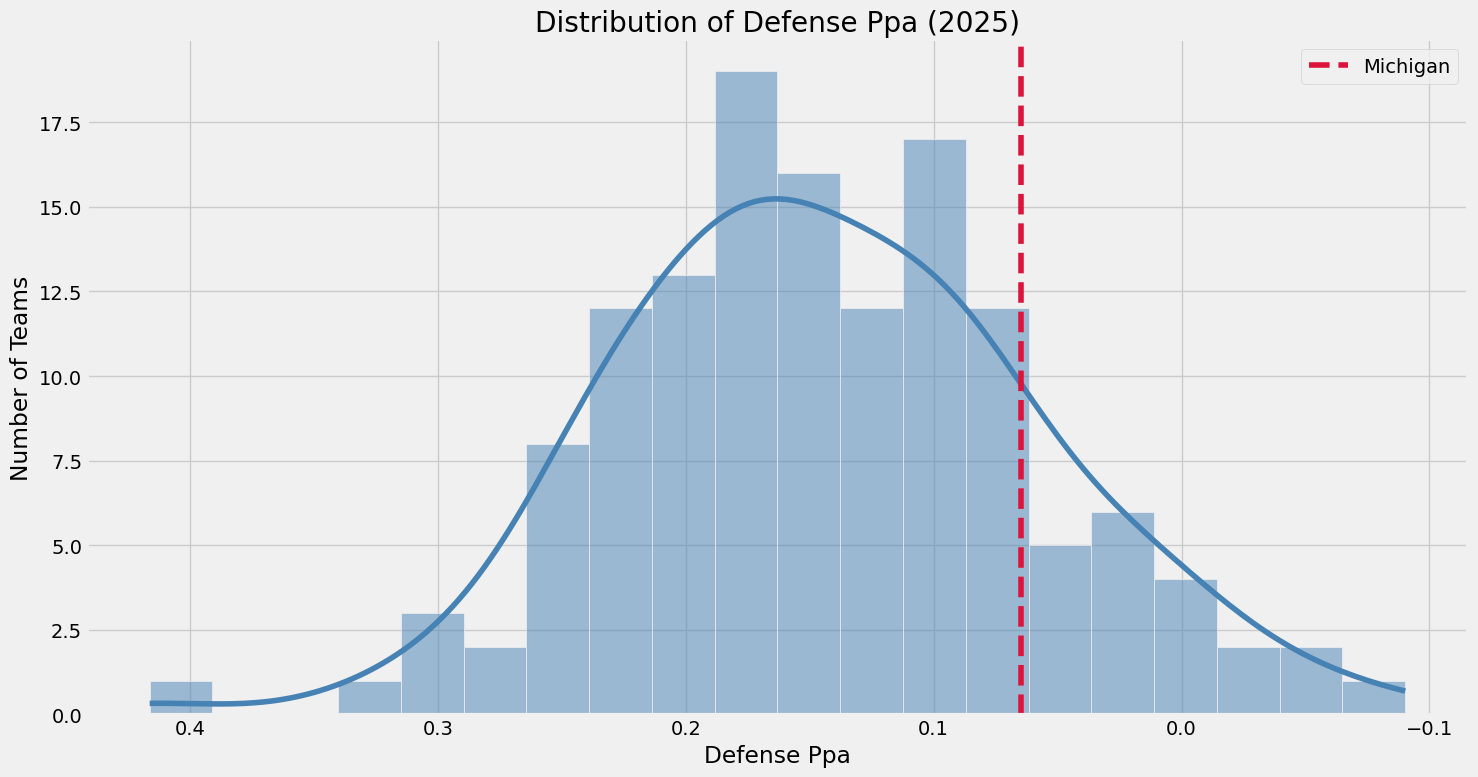

In [5]:
ax = sns.histplot(data=teams, x=metric, bins=20, kde=True, color="steelblue")
plt.title(f"Distribution of {metric.replace('_', ' ').title()} ({current_year})")
plt.xlabel(metric.replace("_", " ").title())
plt.ylabel("Number of Teams")
ax.invert_xaxis()  # Invert x-axis for better readability

# Highlight selected team
highlight_val = teams.loc[teams["team"] == team_to_highlight, metric].values
if len(highlight_val) > 0:
    plt.axvline(highlight_val[0], color="crimson", linestyle="--", label=f"{team_to_highlight}")
    plt.legend()
else:
    print("Team not found.")

plt.tight_layout()
plt.show()

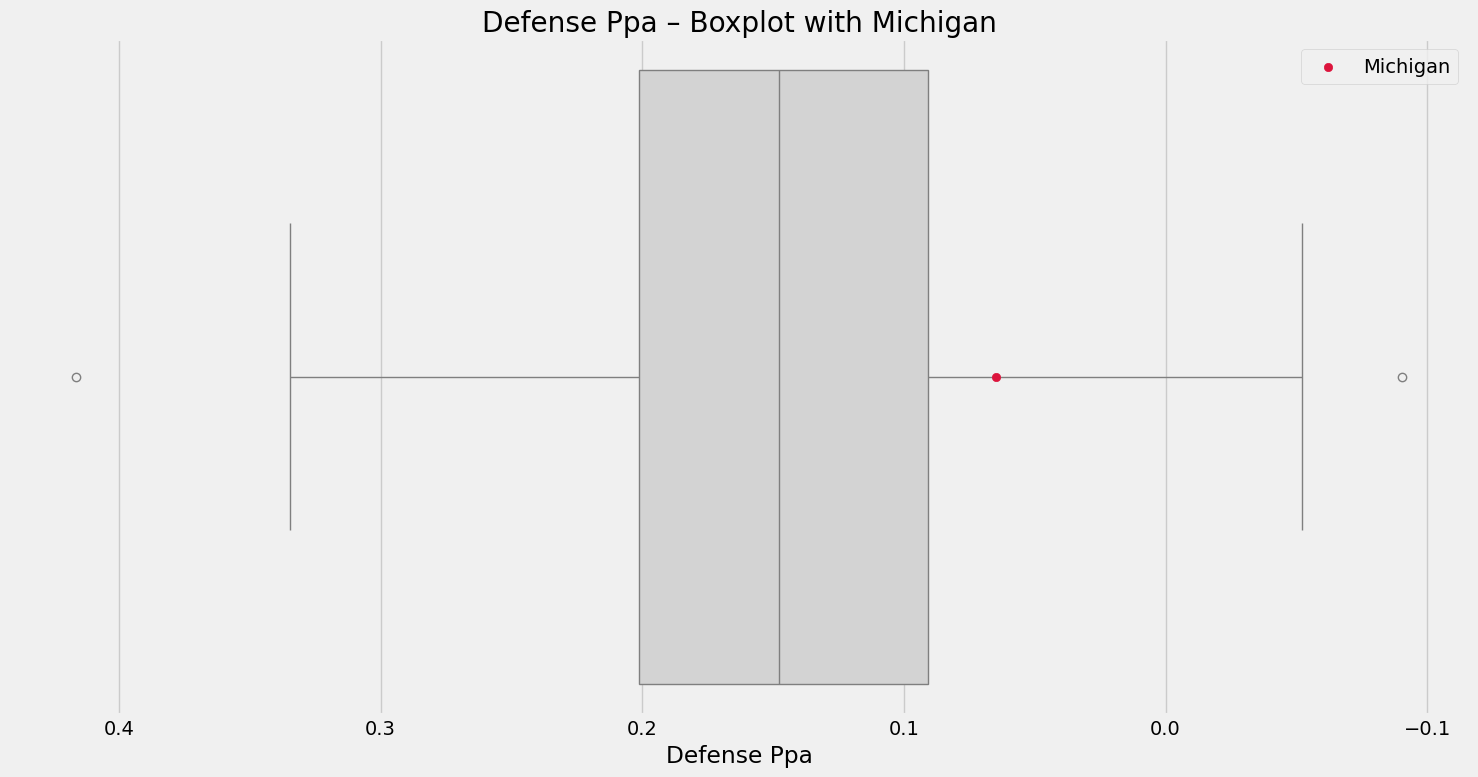

In [6]:
ax = sns.boxplot(data=teams, x=metric, color="lightgray")
plt.scatter(
    x=teams.loc[teams["team"] == team_to_highlight, metric],
    y=[0],
    color="crimson",
    label=team_to_highlight,
    zorder=10
)
ax.invert_xaxis()  # Invert x-axis for better readability
plt.title(f"{metric.replace('_', ' ').title()} – Boxplot with {team_to_highlight}")
plt.xlabel(metric.replace("_", " ").title())
plt.yticks([])
plt.tight_layout()
plt.legend()
plt.show()

In [7]:
highlight = teams[teams["team"] == team_to_highlight].copy()
value = highlight[metric].values[0]
# invert the percentile calculation if lower numbers are better
percentile = (teams[metric] > value).mean() * 100
# use this percentile calculation when higher numbers are better
# percentile = (teams[metric] < value).mean() * 100

print(f"{team_to_highlight}'s {metric}: {value:.3f} ({percentile:.1f}th percentile)")

Michigan's defense_ppa: 0.065 (82.4th percentile)


In [8]:
# ✅ Summary

# In this notebook, you:
# - Selected any numeric metric from the advanced stats
# - Visualized the distribution across FBS teams
# - Highlighted a specific team in the context of the field
# - Estimated percentile standing

# 🧪 Try This:
# - Explore defensive metrics, explosiveness, or tempo
# - Create a dashboard of multiple distributions
# - Use percentiles as input features in your models